In [1]:
%matplotlib inline
from MLEM import *
pipeline = MLEMPipeline(dataset='svo_long_word_level_offset_simplif',
                        take_activation_from="last-token",
                        model='mamba')
pipeline

/home/jsalle/.conda/envs/p11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


MLEMPipeline
Working directory: /scratch2/jsalle/MLEM
Dataset path: /scratch2/jsalle/MLEM/datasets/svo_long_word_level_offset_simplif.csv
Parameters
   dataset: svo_long_word_level_offset_simplif
   _model: mamba
   seed: 0
   step: None
   add_special_tokens: True
   zscore: False
   take_activation_from: last-token
   distance_metric: euclidean
   layer: 5
   min_max: True
   conditional: False

In [2]:
#pipeline.skip_existing = 0
pipeline.compute_features_distance()

2024-06-03 18:46:47.992 | INFO     | MLEM.recording_class:compute_features_distance:125 - Prepare feature distance matrix for dataset svo_long_word_level_offset_simplif
2024-06-03 18:46:47.994 | INFO     | MLEM.recording_class:compute_features_distance:126 - Dataset at /scratch2/jsalle/MLEM/datasets/svo_long_word_level_offset_simplif.csv
2024-06-03 18:46:48.017 | INFO     | MLEM.recording_class:compute_features_distance:128 - 3024 sentences, features: lexical_n_letters, grammatical_gender, grammatical_number, grammatical_pos, grammatical_tense, grammatical_person, sequential_posit_from_start, sentential_question
2024-06-03 18:46:55.701 | INFO     | MLEM.recording_class:compute_features_distance:146 - Done, size (4570776, 8), saved at /scratch2/jsalle/MLEM/data/feature_dist_mat_triu_flat_svo_long_word_level_offset_simplif.npz


In [3]:
pipeline.compute_distance_matrix()

2024-06-03 18:46:55.737 | INFO     | MLEM.recording_class:record:207 - Recording activations...
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Offset dataset detected.


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
2024-06-03 18:47:07.558851: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 18:47:07.558935: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 18:47:07.560524: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-03 18:47:07.573099: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operatio

array([[ 0.      , 16.489723, 15.480356, ..., 25.239447, 18.516825,
        13.535   ],
       [16.489723,  0.      , 18.878956, ..., 27.802038, 21.244276,
        17.566046],
       [15.480356, 18.878956,  0.      , ..., 27.499588, 19.545807,
        17.098362],
       ...,
       [25.239447, 27.802038, 27.499588, ...,  0.      , 29.357655,
        26.541918],
       [18.516825, 21.244276, 19.545807, ..., 29.357655,  0.      ,
        18.996479],
       [13.535   , 17.566046, 17.098362, ..., 26.541918, 18.996479,
         0.      ]], dtype=float32)

In [4]:
for layer in tqdm(range(1, 13)):
    pipeline.layer = layer
    pipeline.compute_feature_importance()

  0%|          | 0/12 [00:00<?, ?it/s]2024-05-30 14:25:09.041 | INFO     | MLEM.distance_class:test_exists:159 - Deleting previous feature importance at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/analysis/last-token/euclidean/zscore_False/layer_1/min_max_True/feature_importance_conditional_False.csv
2024-05-30 14:25:10.078 | INFO     | MLEM.distance_class:test_exists:159 - Deleting previous distance matrix at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/analysis/last-token/euclidean/zscore_False/layer_1/distance_matrix.npz
2024-05-30 14:25:10.090 | INFO     | MLEM.recording_class:test_recordings_exist:189 - Deleting previous recordings in /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/recordings
2024-05-30 14:25:10.248 | INFO     | MLEM.recording_class:record:201 - Recording activations...


Offset dataset detected.


2024-05-30 14:25:13.273 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:25:44.062 | INFO     | MLEM.recording_class:record:259 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/recordings
2024-05-30 14:25:44.362 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:25:46.516 | INFO     | MLEM.distance_class:compute_distance_matrix:189 - Computing distance matrix
2024-05-30 14:25:52.301 | INFO     | MLEM.distance_class:compute_distance_matrix:204 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/analysis/last-token/euclidean/zscore_False/layer_1/distance_matrix.npz
2024-05-30 14:25:52.718 | INFO     | MLEM.regression_class:compute_feature_importance:191 - Computing permutation importance
2024-05-30 14:30:22.292 | INFO     | MLEM.regression_class:compute_feature_importance:211 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level

Offset dataset detected.


2024-05-30 14:30:25.237 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:30:46.427 | INFO     | MLEM.recording_class:record:259 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/recordings
2024-05-30 14:30:46.566 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:30:47.896 | INFO     | MLEM.distance_class:compute_distance_matrix:189 - Computing distance matrix
2024-05-30 14:30:52.498 | INFO     | MLEM.distance_class:compute_distance_matrix:204 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/analysis/last-token/euclidean/zscore_False/layer_2/distance_matrix.npz
2024-05-30 14:30:52.775 | INFO     | MLEM.regression_class:compute_feature_importance:191 - Computing permutation importance
2024-05-30 14:33:35.435 | INFO     | MLEM.regression_class:compute_feature_importance:211 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level

Offset dataset detected.


2024-05-30 14:33:39.524 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:34:11.042 | INFO     | MLEM.recording_class:record:259 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/recordings
2024-05-30 14:34:11.189 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:34:13.384 | INFO     | MLEM.distance_class:compute_distance_matrix:189 - Computing distance matrix
2024-05-30 14:34:24.582 | INFO     | MLEM.distance_class:compute_distance_matrix:204 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/analysis/last-token/euclidean/zscore_False/layer_3/distance_matrix.npz
2024-05-30 14:34:25.093 | INFO     | MLEM.regression_class:compute_feature_importance:191 - Computing permutation importance
2024-05-30 14:37:28.463 | INFO     | MLEM.regression_class:compute_feature_importance:211 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level

Offset dataset detected.


2024-05-30 14:37:30.898 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:37:51.545 | INFO     | MLEM.recording_class:record:259 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/recordings
2024-05-30 14:37:51.661 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:37:52.905 | INFO     | MLEM.distance_class:compute_distance_matrix:189 - Computing distance matrix
2024-05-30 14:37:57.328 | INFO     | MLEM.distance_class:compute_distance_matrix:204 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/analysis/last-token/euclidean/zscore_False/layer_4/distance_matrix.npz
2024-05-30 14:37:57.587 | INFO     | MLEM.regression_class:compute_feature_importance:191 - Computing permutation importance
2024-05-30 14:40:12.758 | INFO     | MLEM.regression_class:compute_feature_importance:211 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level

Offset dataset detected.


2024-05-30 14:40:16.418 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:40:46.367 | INFO     | MLEM.recording_class:record:259 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/recordings
2024-05-30 14:40:46.487 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:40:48.500 | INFO     | MLEM.distance_class:compute_distance_matrix:189 - Computing distance matrix
2024-05-30 14:40:58.635 | INFO     | MLEM.distance_class:compute_distance_matrix:204 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/analysis/last-token/euclidean/zscore_False/layer_5/distance_matrix.npz
2024-05-30 14:40:58.892 | INFO     | MLEM.regression_class:compute_feature_importance:191 - Computing permutation importance
2024-05-30 14:43:51.397 | INFO     | MLEM.regression_class:compute_feature_importance:211 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level

Offset dataset detected.


2024-05-30 14:43:54.405 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:44:19.318 | INFO     | MLEM.recording_class:record:259 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/recordings
2024-05-30 14:44:19.418 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:44:21.027 | INFO     | MLEM.distance_class:compute_distance_matrix:189 - Computing distance matrix
2024-05-30 14:44:26.977 | INFO     | MLEM.distance_class:compute_distance_matrix:204 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/analysis/last-token/euclidean/zscore_False/layer_6/distance_matrix.npz
2024-05-30 14:44:27.225 | INFO     | MLEM.regression_class:compute_feature_importance:191 - Computing permutation importance
2024-05-30 14:46:28.889 | INFO     | MLEM.regression_class:compute_feature_importance:211 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level

Offset dataset detected.


2024-05-30 14:46:31.998 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:47:00.368 | INFO     | MLEM.recording_class:record:259 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/recordings
2024-05-30 14:47:00.528 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:47:02.082 | INFO     | MLEM.distance_class:compute_distance_matrix:189 - Computing distance matrix
2024-05-30 14:47:07.920 | INFO     | MLEM.distance_class:compute_distance_matrix:204 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/analysis/last-token/euclidean/zscore_False/layer_7/distance_matrix.npz
2024-05-30 14:47:08.177 | INFO     | MLEM.regression_class:compute_feature_importance:191 - Computing permutation importance
2024-05-30 14:49:55.882 | INFO     | MLEM.regression_class:compute_feature_importance:211 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level

Offset dataset detected.


2024-05-30 14:49:59.103 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:50:29.753 | INFO     | MLEM.recording_class:record:259 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/recordings
2024-05-30 14:50:29.854 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:50:31.613 | INFO     | MLEM.distance_class:compute_distance_matrix:189 - Computing distance matrix
2024-05-30 14:50:44.033 | INFO     | MLEM.distance_class:compute_distance_matrix:204 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/analysis/last-token/euclidean/zscore_False/layer_8/distance_matrix.npz
2024-05-30 14:50:44.428 | INFO     | MLEM.regression_class:compute_feature_importance:191 - Computing permutation importance
2024-05-30 14:52:57.410 | INFO     | MLEM.regression_class:compute_feature_importance:211 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level

Offset dataset detected.


2024-05-30 14:52:59.715 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:53:20.744 | INFO     | MLEM.recording_class:record:259 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/recordings
2024-05-30 14:53:20.867 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:53:22.155 | INFO     | MLEM.distance_class:compute_distance_matrix:189 - Computing distance matrix
2024-05-30 14:53:25.877 | INFO     | MLEM.distance_class:compute_distance_matrix:204 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/analysis/last-token/euclidean/zscore_False/layer_9/distance_matrix.npz
2024-05-30 14:53:26.090 | INFO     | MLEM.regression_class:compute_feature_importance:191 - Computing permutation importance
2024-05-30 14:55:51.521 | INFO     | MLEM.regression_class:compute_feature_importance:211 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level

Offset dataset detected.


2024-05-30 14:55:54.540 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:56:24.315 | INFO     | MLEM.recording_class:record:259 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/recordings
2024-05-30 14:56:24.531 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:56:26.248 | INFO     | MLEM.distance_class:compute_distance_matrix:189 - Computing distance matrix
2024-05-30 14:56:38.668 | INFO     | MLEM.distance_class:compute_distance_matrix:204 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/analysis/last-token/euclidean/zscore_False/layer_10/distance_matrix.npz
2024-05-30 14:56:38.933 | INFO     | MLEM.regression_class:compute_feature_importance:191 - Computing permutation importance
2024-05-30 14:59:12.305 | INFO     | MLEM.regression_class:compute_feature_importance:211 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_leve

Offset dataset detected.


2024-05-30 14:59:14.916 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:59:39.500 | INFO     | MLEM.recording_class:record:259 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/recordings
2024-05-30 14:59:39.631 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 14:59:41.346 | INFO     | MLEM.distance_class:compute_distance_matrix:189 - Computing distance matrix
2024-05-30 14:59:46.815 | INFO     | MLEM.distance_class:compute_distance_matrix:204 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/analysis/last-token/euclidean/zscore_False/layer_11/distance_matrix.npz
2024-05-30 14:59:47.032 | INFO     | MLEM.regression_class:compute_feature_importance:191 - Computing permutation importance
2024-05-30 15:02:19.616 | INFO     | MLEM.regression_class:compute_feature_importance:211 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_leve

Offset dataset detected.


2024-05-30 15:02:23.111 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 15:02:52.613 | INFO     | MLEM.recording_class:record:259 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/recordings
2024-05-30 15:02:52.837 | INFO     | MLEM.base_class:get_device:94 - Running on cpu
2024-05-30 15:02:54.589 | INFO     | MLEM.distance_class:compute_distance_matrix:189 - Computing distance matrix
2024-05-30 15:03:07.638 | INFO     | MLEM.distance_class:compute_distance_matrix:204 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/analysis/last-token/euclidean/zscore_False/layer_12/distance_matrix.npz
2024-05-30 15:03:08.010 | INFO     | MLEM.regression_class:compute_feature_importance:191 - Computing permutation importance
2024-05-30 15:05:47.814 | INFO     | MLEM.regression_class:compute_feature_importance:211 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_leve

In [20]:
sentences, _ = pipeline.from_word_level_df_to_sentences()
sentences

0                 the woman plays
1                 the woman sings
2               the woman sneezes
3                the woman played
4                  the woman sang
                  ...            
967      which pencils disappear?
968         which pencils vanish?
969           which pencils fell?
970    which pencils disappeared?
971       which pencils vanished?
Name: sentences, Length: 972, dtype: object

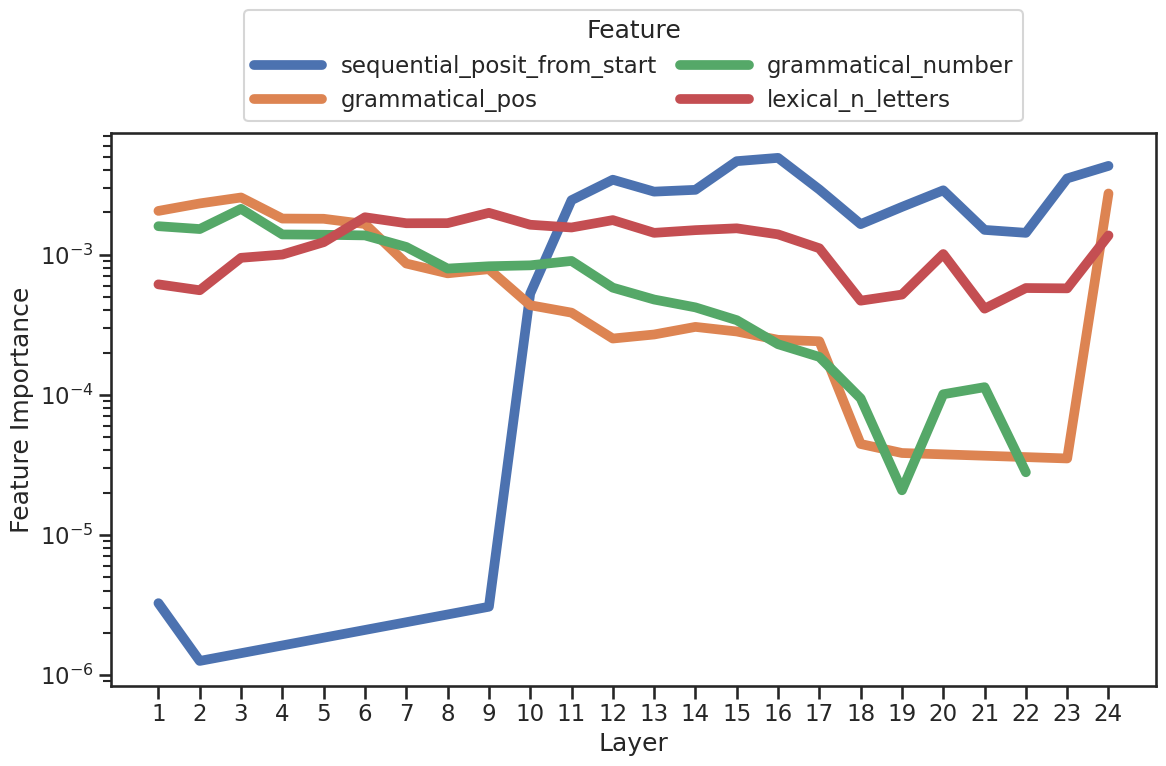

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax = pipeline.plot_feature_importance()
fig.savefig('figures/svo_long_offset/feature_importance_mamba_last-token.png')

In [6]:
pipeline.skip_existing = 0 # Remove if recomputing is not necessary

palette = sns.color_palette("tab20b", 20) + sns.color_palette("pastel")
hierarchy = ["grammatical_pos", "grammatical_number", "lexical_n_letters"]

for layer_id in range(1, 6): # Remove for loop to get MDS plot
    pipeline.layer = layer_id
    pipeline.compute_mds()

    ax = pipeline.plot_mds(hierarchy=hierarchy,
                           markers=["o", "^", "X", "v", "<", ">", "D", "P", "s", "p", "*", "h", "H", "+", "x"],
                           palette=palette,
                           simplified=False
    )
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    plt.savefig(f'figures/svo_long_offset/mds_{pipeline.model}_l{layer_id}_{pipeline.take_activation_from}.png')
    ax.cla()
    plt.show()

2024-06-04 11:42:21.118 | INFO     | MLEM.distance_class:test_exists:159 - Deleting previous distance matrix at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/mamba/spe_tok/analysis/last-token/euclidean/zscore_False/layer_20/distance_matrix.npz
2024-06-04 11:42:21.134 | INFO     | MLEM.recording_class:test_recordings_exist:195 - Deleting previous recordings in /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/mamba/spe_tok/recordings
2024-06-04 11:42:21.332 | INFO     | MLEM.recording_class:record:207 - Recording activations...
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Offset dataset detected.


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
2024-06-04 11:42:23.808 | INFO     | MLEM.base_class:get_device:94 - Running on cpu


In [7]:
pipeline.layer = 1
palette = sns.color_palette("tab20b", 20) + sns.color_palette("pastel")
pipeline.compute_mds()
hierarchy = ["sequential_posit_from_start"]

ax = pipeline.plot_mds(hierarchy=hierarchy,
                        markers=["o", "^", "X", "v", "<", ">", "D", "P", "s", "p", "*", "h", "H", "+", "x"],
                        palette=palette,
                        simplified=True
)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

2024-05-23 11:42:34.267 | INFO     | MLEM.distance_class:test_exists:156 - distance matrix exists, reading from /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/analysis/last-token/euclidean/zscore_False/layer_1/distance_matrix.npz


2024-05-23 11:42:44.677 | INFO     | MLEM.distance_class:compute_mds:227 - Computing MDS matrix
2024-05-23 12:13:36.889 | INFO     | MLEM.distance_class:compute_mds:243 - Done, saved at /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/analysis/last-token/euclidean/zscore_False/layer_1/mds_matrix.npz


ValueError: Length of values (13716) does not match length of index (3024)

In [9]:
pipeline.compute_distance_matrix().shape

2024-05-23 15:34:55.116 | INFO     | MLEM.distance_class:test_exists:156 - distance matrix exists, reading from /scratch2/jsalle/MLEM/experiments/svo_long_word_level_offset_simplif/gpt2/spe_tok/analysis/last-token/euclidean/zscore_False/layer_1/distance_matrix.npz


(13716, 13716)

### Alternative MDS

In [4]:
from sklearn.manifold import MDS

mds = MDS(
    n_components=2,
    max_iter=200,
    eps=1e-4,
    n_init=1,
    dissimilarity="precomputed",
    normalized_stress="auto"
)
distance_matrix = pipeline.compute_distance_matrix()
mds_matrix = mds.fit_transform(distance_matrix)

2024-05-13 09:57:48.660 | INFO     | MLEM.distance_class:test_exists:156 - distance matrix exists, reading from /scratch2/jsalle/MLEM/experiments/clause_type_word_level_simplif/bert-base-uncased/spe_tok/analysis/last-token/euclidean/zscore_False/layer_5/distance_matrix.npz
